# Plot parcel damage v.s. return period

<div id="toc"></div>

In [2]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter

In [3]:
%matplotlib inline

In [4]:
os.getcwd()

'I:\\RESEARCH\\_PAPERS\\MANUSCRIPT\\FIG\\zCase_ForPaper\\BizDmgTr'

## Read data

In [5]:
CC = pd.read_csv('CC/Cur2000DmgTr.csv',header=None)
GP = pd.read_csv('GP/Cur2000DmgTr.csv',header=None)
PC = pd.read_csv('PC/Cur2000DmgTr.csv',header=None)

In [6]:
CC.head() # SEC

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,10.0,-458081520.0,-2586.76720,-280.745990,-15967754.0,-352.979510,-17.254717,-1120101.40,-349.482310,-381.709210,-8293568.90,-59.078776,-3.376576,-17798129.0,-200.538360,-7.381352,-311743130.0,-1132.34220,-146.711290
1,20.0,-59052398.0,-570.89265,-60.479547,-3663127.7,-79.837081,-3.774052,-947727.25,-147.704650,-162.425510,-3885492.40,-28.526787,-0.869355,-7364521.7,-85.795241,-2.662638,-38538140.0,-226.69892,-29.647051
2,25.0,116674190.0,282.41574,37.507590,1847705.5,44.944638,3.912503,-861540.17,-46.815821,-52.783655,-1681454.20,-13.250792,0.384256,-2147718.2,-28.423683,-0.303280,113269450.0,208.52151,31.186978
3,30.0,248203640.0,1415.69440,150.589500,10676953.0,253.080360,16.479833,-775353.09,16.916257,0.928401,522584.01,2.025203,2.254537,3614193.0,22.455641,3.146207,223267520.0,1014.95540,122.064810
4,40.0,353142740.0,2274.55190,250.749750,14654066.0,349.924520,25.098574,-602978.94,117.091960,2.847537,3935596.70,21.003085,6.734990,8641713.1,51.537924,7.667331,300615870.0,1616.13210,208.143350


In [7]:
GP.head() # ESC

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,10.0,-24007.47000,-1.530721e+09,-453.22803,-1.761755e+08,-8.815856e+10,-387.932960,-418.186550,-2.041338e+07,-104.804520,-1260.328600,-281770310.0,-189.464570,-1044.179800,-3403703.10,-24.561793,-1576.035800,-2.601586e+08,-330.685250
1,20.0,-188.69644,1.625416e+07,-2.76867,-3.543557e+06,-1.772349e+09,-4.363539,-2.388301,4.141875e+03,-0.654036,-650.020080,-145397620.0,-97.015290,-470.184350,-2093651.20,-11.218924,65.061801,1.343890e+07,-1.430209
2,25.0,6968.17830,6.826618e+08,170.01504,4.682580e+03,3.398645e+08,10.906099,379.249190,2.234796e+07,28.546463,-344.865820,-77211271.0,-50.790649,-183.186630,-1438625.20,-4.547489,1927.369700,3.225559e+08,132.842850
3,30.0,10640.92700,1.204554e+09,370.56372,6.162863e+03,4.009471e+08,16.976885,718.726730,3.929331e+07,43.476784,-39.711563,-9024922.8,-4.566008,96.453639,-783599.28,1.889155,3629.978600,6.647556e+08,310.358590
4,40.0,17473.66600,2.192361e+09,884.74195,9.611428e+03,6.486442e+08,26.941083,1327.918400,6.920269e+07,76.243254,146.258730,26176816.0,30.686724,208.353340,547030.51,7.126732,6285.668200,1.466060e+09,746.665880


In [8]:
PC.head() # SEC

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,10.0,-182287540.0,-3002.37880,-120.926610,-6856810.50,-152.630090,-13.370522,-30161224.0,-109.454330,-7.361901,-1542736.70,-5084.87950,-107.354470,-5997802.200,-37.400451,-20.650906,-185191470.0,-3842.91170,-122.538900
1,20.0,-83488629.0,-815.45297,-39.307796,-3840415.80,-86.098323,-6.853840,-20450046.0,-71.733600,-4.062180,-1189459.30,-578.59879,-12.158481,-2007765.500,-12.295672,-6.174144,-85898282.0,-1152.38570,-43.382489
2,25.0,-34089171.0,278.00995,1.501609,-2332218.50,-52.832438,-3.595499,-15594457.0,-52.873236,-2.412320,-1012820.60,110.76414,1.820722,-12747.158,0.256717,1.064238,-36251686.0,192.87728,-3.804284
3,30.0,15310287.0,486.83794,42.469979,-824021.09,-19.566553,-0.337157,-10738868.0,-34.012872,-0.762459,-836181.86,113.27506,1.906807,1982271.200,12.779760,6.339250,13394909.0,375.56415,33.529287
4,40.0,165763250.0,1155.06350,154.396100,2236568.40,47.854303,7.625438,-1027689.5,3.707857,2.537262,-482904.42,118.29690,2.078979,7567683.400,74.489071,17.800897,154786940.0,872.97987,124.873960


## Plot Sales Volume

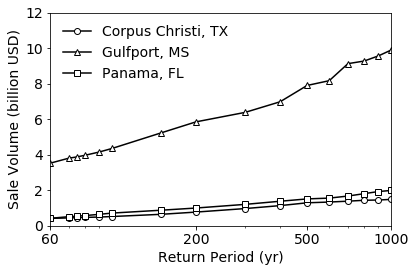

In [9]:
font = {'size':14}
matplotlib.rc('font', **font)

plt.semilogx(CC[0],CC[1]/1000000000,'-ko',
             GP[0],GP[2]/1000000000,'-k^',
             PC[0],PC[1]/1000000000,'-ks',markerfacecolor='white')

plt.xlim([60,1000])
plt.ylim([0, 12])
plt.xticks([60,200,500,1000], ['60','200','500','1000'])
plt.xlabel('Return Period (yr)')
plt.ylabel('Sale Volume (billion USD)')
plt.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], frameon=False)
plt.tight_layout()
plt.savefig('SV.png', dpi=300)

## Plot Employee Size

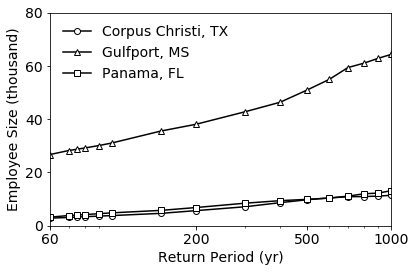

In [10]:
plt.semilogx(CC[0],CC[2]/1000,'-ko',
             GP[0],GP[1]/1000,'-k^',
             PC[0],PC[2]/1000,'-ks',markerfacecolor='white')
plt.xlim([60,1000])
plt.ylim([0,80])
plt.xticks([60,200,500,1000], ['60','200','500','1000'])
plt.xlabel('Return Period (yr)')
plt.ylabel('Employee Size (thousand)')
plt.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], frameon=False)
plt.tight_layout()
plt.savefig('ES.png', dpi=300)

## Plot Business Count

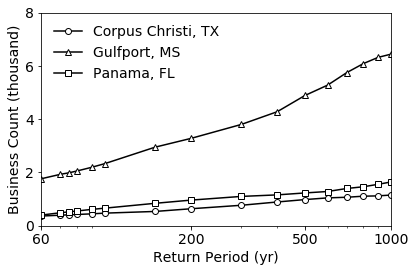

In [11]:
plt.semilogx(CC[0],CC[3]/1000,'-ko',
             GP[0],GP[3]/1000,'-k^',
             PC[0],PC[3]/1000,'-ks',markerfacecolor='white')
plt.xlim([60,1000])
plt.ylim([0,8])
plt.xticks([60,200,500,1000], ['60','200','500','1000'])
plt.xlabel('Return Period (yr)')
plt.ylabel(r'Business Count (thousand)')
plt.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], frameon=False)
plt.tight_layout()
plt.savefig('BC.png', dpi=300)

# Read Summary Table

In [12]:
from simpledbf import Dbf5

In [13]:
ST = pd.read_csv('BizTotal.csv')

In [14]:
ST

,Unnamed: 0,S,E,C
0,CC,30407637014,177867,18750
1,GP,17041938000,104065,11938
2,PC,16822190200,100152,11917
3,Total,64271765214,382084,42605


In [15]:
TotS = ST.S[3]
TotE = ST.E[3]
TotC = ST.C[3]

# Plot biz damage in percentage

## Plot Sales Volume pct

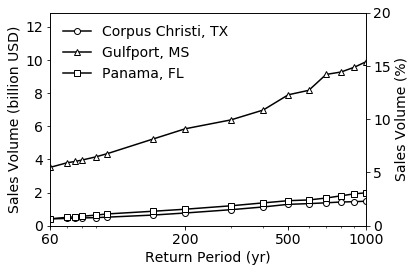

In [17]:
font = {'size':14}
matplotlib.rc('font', **font)

fig, ax1 = plt.subplots()
ax1.semilogx(CC[0],CC[1]/1000000000,'-ko',
             GP[0],GP[2]/1000000000,'-k^',
             PC[0],PC[1]/1000000000,'-ks',markerfacecolor='white')


ax2 = ax1.twinx()
ax2.semilogx(CC[0],CC[1]/TotS*100, alpha=0)

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_xlabel('Return Period (yr)')

ax1.set_ylabel('Sales Volume (billion USD)')
ax2.set_ylabel('Sales Volume (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_ylim([0,TotS/1000000000*0.2])
ax2.set_ylim([0,20])

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

ax2.set_yticks([0,5,10,15,20])
ax2.set_yticklabels(['0','5','10','15','20'])

ax1.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig('SVpct.png', dpi=300)

## Plot Employee Size pct

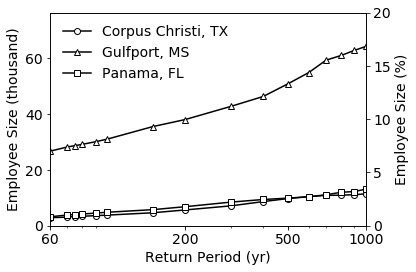

In [18]:
fig, ax1 = plt.subplots()
ax1.semilogx(CC[0],CC[2]/1000,'-ko',
             GP[0],GP[1]/1000,'-k^',
             PC[0],PC[2]/1000,'-ks',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(CC[0],CC[1]/TotE*100, alpha=0)

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_xlabel('Return Period (yr)')

ax1.set_ylabel('Employee Size (thousand)')
ax2.set_ylabel('Employee Size (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_ylim([0,TotE/1000*0.2])
ax2.set_ylim([0,100*0.2])

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

ax2.set_yticks([0,5,10,15,20])
ax2.set_yticklabels(['0','5','10','15','20'])

ax1.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig('ESpct.png', dpi=300)

## Plot Business Count pct

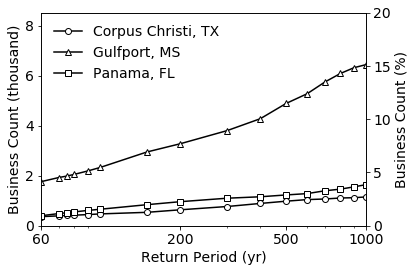

In [19]:
fig, ax1 = plt.subplots()
ax1.semilogx(CC[0],CC[3]/1000,'-ko',
             GP[0],GP[3]/1000,'-k^',
             PC[0],PC[3]/1000,'-ks',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(CC[0],CC[1]/TotE*100, alpha=0)

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.set_xlabel('Return Period (yr)')

ax1.set_ylabel('Business Count (thousand)')
ax2.set_ylabel('Business Count (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_ylim([0,TotC/1000*0.2])
ax2.set_ylim([0,100*0.2])

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

ax2.set_yticks([0,5,10,15,20])
ax2.set_yticklabels(['0','5','10','15','20'])

ax1.legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'], loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig('BCpct.png', dpi=300)

# Below is for reference











NameError: name 'ImpTotCC' is not defined

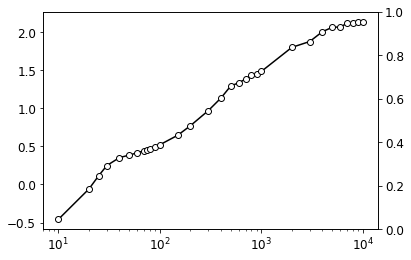

In [18]:
fig, ax1 = plt.subplots()
ax1.semilogx(CC[0],CC[1]/1000000000,'-ko',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(CC[0],CC[1]/ImpTotCC*100*2, alpha=0)

ax1.set_ylabel('Loss (billion USD)')
ax2.set_ylabel('Loss (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_xlabel('Return Period (yr)')

ax1.legend(['Corpus Christi, TX'], loc='upper left', frameon=False)

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

plt.savefig('LossCC.png', dpi=300)

# ax1.set_ylabel('Loss (billion USD)')
# legend(['Corpus Christi, TX','Gulfport, MS','Panama, FL'])

In [ ]:
fig, ax1 = plt.subplots()
ax1.semilogx(GP[0],GP[1]/1000000000,'-k^',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(GP[0],GP[1]/ImpTotGP*100, alpha=0.1)

ax1.set_ylabel('Loss (billion USD)')
ax2.set_ylabel('Loss (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_xlabel('Return Period (yr)')

ax1.legend(['Gulfport, MS'], loc='upper left', frameon=False)

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

plt.savefig('LossGP.png', dpi=300)

In [ ]:
fig, ax1 = plt.subplots()
ax1.semilogx(PC[0],PC[1]/1000000000,'-ks',markerfacecolor='white')

ax2 = ax1.twinx()
ax2.semilogx(PC[0],PC[1]/ImpTotPC*100, alpha=0.1)

ax1.set_ylabel('Loss (billion USD)')
ax2.set_ylabel('Loss (%)')

ax1.set_xlim([60,1000])
ax2.set_xlim([60,1000])

ax1.set_ylim([0,ImpTotPC/1000000000])
ax2.set_ylim([0,100])

ax1.set_xlabel('Return Period (yr)')

ax1.legend(['Gulfport, MS'], loc='upper left', frameon=False)

ax1.set_xticks([60,200,500,1000])
ax1.set_xticklabels(['60','200','500','1000'])

plt.savefig('LossPC.png', dpi=300)